In [1]:
import os
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd

from main import main

from query import DataLoader

load_dotenv()

groq_key = os.environ['groqkey']

data_path = Path(os.environ['data_path'])


/Users/reedevans/Documents/mids/deprescribe_main/DataSci210_MedicationDeprescriber/src/extraction.py:17: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="NeuML/pubmedbert-base-embeddings")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
#already_run.to_csv('already_run.csv', index=False)

already_run = pd.read_csv('already_run.csv')

In [13]:
labeled_df.shape

(18, 13)

In [5]:

labeled_df = labeled_df[~labeled_df['key'].isin(already_run.key)]
#labeled_df.shape

In [4]:
dl = DataLoader(data_path)

labeled_df = dl.get_label_df()
#labeled_df = labeled_df.sample(10)
#labeled_df = labeled_df[labeled_df.key == 'D6C6E04C56E5D7']

In [6]:
notes = pd.read_csv(dl.data_path / "labled_notes_w_summary.csv")

In [7]:
for index, row in labeled_df.iterrows():
    encounter_key = row["key"]
    print("label_index:",index," key:",encounter_key)
    ret_recommendation, ret_reasoning, token_usage, search_history_so_far, token_count_history = main(
        groq_key=groq_key, data_path=data_path, encounter_key=encounter_key
    )
    print(ret_recommendation)
    labeled_df.at[index, 'ret_recommendation'] = ret_recommendation
    labeled_df.at[index, 'ret_reasoning'] = ret_reasoning
    labeled_df.at[index, 'token_usage'] = token_usage
    labeled_df.at[index, 'search_history_so_far'] = str(search_history_so_far)
    labeled_df.at[index, 'token_count_history'] = str(token_count_history)



label_index: 24  key: D267D1234A0576
no notes found
deprescribe
label_index: 25  key: DC2661C3B5DC2A
deprescribe
label_index: 26  key: D57176E8D660E4
deprescribe
label_index: 27  key: D188F3E1578728
deprescribe
label_index: 28  key: D6C6E04C56E5D7
no notes found
deprescribe
label_index: 29  key: DF66490AD8A6B6
deprescribe
label_index: 30  key: D02DC627A3743A
deprescribe
label_index: 31  key: D01FCB9EFFD6D5
no notes found
deprescribe
label_index: 32  key: D03868A75BBE62
continue
label_index: 33  key: D038C6CE0A2867
deprescribe
label_index: 34  key: D03999FEAA1FCD
deprescribe
label_index: 35  key: D67731C3136779
deprescribe
label_index: 36  key: D5A533360225FF
deprescribe
label_index: 37  key: SyntheticPt1
stop
label_index: 38  key: SyntheticPt2
deprescribe
label_index: 39  key: SyntheticPt3
stop
label_index: 40  key: SyntheticPt4
deprescribe
label_index: 41  key: SyntheticPt5
deprescribe


In [9]:
#already_run = labeled_df[labeled_df.token_usage>0]
df = pd.concat([labeled_df, already_run])

In [ ]:
labeled_df

In [11]:
df

,review_by,validated_by,key,reason,recommendation,diagnosis,GS_response,Note,ret_recommendation,ret_reasoning,token_usage,search_history_so_far,token_count_history
24,Ben,NaN,D267D1234A0576,can recommend deprescribing. Pt came in on bu...,deprescribe,10-No Diagnosis,Pt was given lansoprazole 30mg during stay. U...,NaN,deprescribe,No diagnoses found in notes,4043.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 594, 'encounters..."
25,Ben,NaN,DC2661C3B5DC2A,can recommend deprescribing. Pt came in on bu...,deprescribe,10-No Diagnosis,Pt came in on lansoprazole and was changed to ...,NaN,deprescribe,The recommendation is to deprescribe the medic...,10215.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 672, 'encounters..."
26,Joanna,NaN,D57176E8D660E4,can recommend deprescribing as patient has GERD,deprescribe,9-Treated GERD,Pt came in on lansoprazole 30 mg daily before ...,NaN,deprescribe,The recommendation is to deprescribe the medic...,12853.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 608, 'encounters..."
27,Joanna,NaN,D188F3E1578728,can recommend deprescribing as patient has GERD,deprescribe,9-Treated GERD,Pt came in on lansoprazole 30 mg daily before ...,NaN,deprescribe,The recommendation is to deprescribe the medic...,11113.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 586, 'encounters..."
28,Joanna,NaN,D6C6E04C56E5D7,can recommend stopping. Pt came in on but no c...,deprescribe,10-No Diagnosis,Pt was admitted on 30 mg but no clear reason f...,NaN,deprescribe,No diagnoses found in notes,4112.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 643, 'encounters..."
29,Joanna,NaN,DF66490AD8A6B6,can recommend deprescribing as patient has GERD,deprescribe,9-Treated GERD,Pt came in on lansoprazole 30 mg daily before ...,NaN,deprescribe,The recommendation is to deprescribe the proto...,14816.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 605, 'encounters..."
30,Joanna,NaN,D02DC627A3743A,can recommend stopping. Pt came in on but no c...,deprescribe,10-No Diagnosis,Pt was given lansoprazole and pantoprazole dur...,NaN,deprescribe,The recommendation is to deprescribe the medic...,9795.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 645, 'encounters..."
31,reed (model),NaN,D01FCB9EFFD6D5,"the patient reports ""digestive issues"" and ""bl...",stop,5-Upper GI Acute Reflux,{'Upper_GI_symptoms': [Document(metadata={'dei...,NaN,deprescribe,No diagnoses found in notes,4025.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 610, 'encounters..."
32,reed (model),NaN,D03868A75BBE62,"""yes.\n\nthe evidence of barrett's esophagus i...",continue,0-Barrett's Esophagus,{'Barretts_Esophagus': [Document(metadata={'de...,NaN,continue,The recommendation is to continue the medicati...,6141.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 606, 'encounters..."
33,reed (model),NaN,D038C6CE0A2867,"yes, there is evidence of upper gi symptoms. t...",deprescribe,9-Treated GERD,{'Upper_GI_symptoms': [Document(metadata={'dei...,NaN,deprescribe,The recommendation is to deprescribe the medic...,17951.0,{'diagnosis_source_continue': {'diagnosis_bool...,"{'diagnosis_source_continue': 596, 'encounters..."


Accuracy: 0.7857
Precision (Macro Avg): 0.8723
Recall (Macro Avg): 0.6989
F1 Score (Macro Avg): 0.7510

Classification Report:
               precision    recall  f1-score   support

    continue       0.88      0.54      0.67        13
 deprescribe       0.74      0.96      0.84        24
        stop       1.00      0.60      0.75         5

    accuracy                           0.79        42
   macro avg       0.87      0.70      0.75        42
weighted avg       0.81      0.79      0.77        42



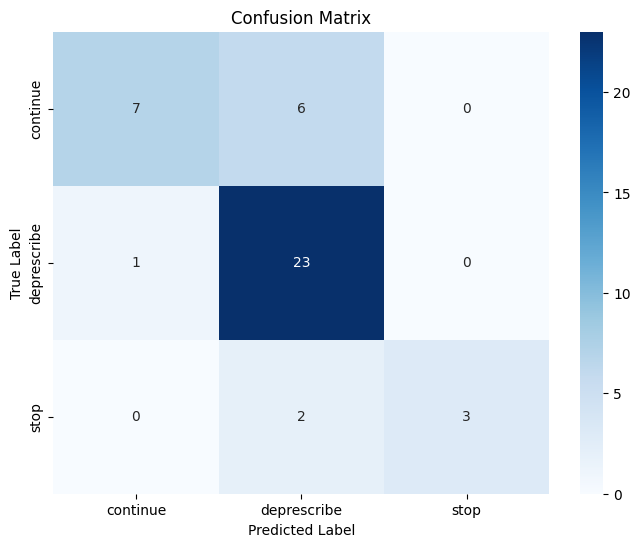

In [10]:
from eval import evaluate_multiclass_classification, get_best_diagnosis_match

y_true = df['recommendation']
y_pred = df['ret_recommendation']
class_labels = ['continue', 'deprescribe', 'stop']

# Evaluate the model
metrics = evaluate_multiclass_classification(y_true, y_pred, class_labels)

# Perform Diagnoses Evaluations

In [1]:
import pandas as pd

df = pd.read_csv('summary_with_notes_run_results.csv')

In [ ]:
from eval import evaluate_multiclass_classification, get_best_diagnosis_match

df['diagnosis_key'] = df['diagnosis'].str.split('-').str[0]

for index, row in df.iterrows():
    matched_diagnosis_key, matched_diagnosis_label = get_best_diagnosis_match(row.ret_reasoning)
    df.at[index, 'matched_diagnosis_key'] = matched_diagnosis_key
    df.at[index, 'matched_diagnosis_label'] = matched_diagnosis_label
    

In [2]:
df['matched_diagnosis_key'] = df['matched_diagnosis_key'].astype(int)

In [7]:
[f"{i}" for i in range(0,11)]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

Accuracy: 0.5714
Precision (Macro Avg): 0.6628
Recall (Macro Avg): 0.5727
F1 Score (Macro Avg): 0.5702

Classification Report:
               precision    recall  f1-score   support

    BarrEsph       1.00      1.00      1.00         2
   ChroNSAID       0.50      0.25      0.33         4
SevGERD-Esph       1.00      0.25      0.40         4
    UGIBleed       0.60      1.00      0.75         3
 UGIAcuteRef       0.33      0.50      0.40         2
 StrUlcProph       1.00      0.50      0.67         2
        HPyl       1.00      1.00      1.00         1
      MiEsph       0.00      0.00      0.00         1
        GERD       0.44      0.73      0.55        11
        None       0.75      0.50      0.60        12

    accuracy                           0.57        42
   macro avg       0.66      0.57      0.57        42
weighted avg       0.65      0.57      0.56        42



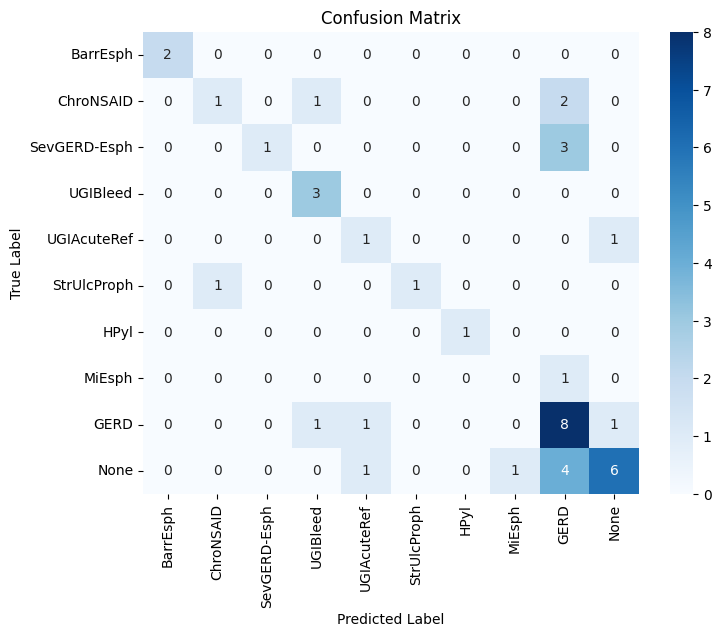

In [9]:
from eval import evaluate_multiclass_classification, get_best_diagnosis_match

y_true = df['diagnosis_key']
y_pred = df['matched_diagnosis_key']
class_labels = ['BarrEsph', 'ChroNSAID', 'SevGERD-Esph', 'UGIBleed', 'UGIAcuteRef', 'StrUlcProph', 'HPyl', 'MiEsph', 'GERD', 'None']


# Evaluate the model
metrics = evaluate_multiclass_classification(y_true, y_pred, class_labels)

In [5]:
df.to_csv('summary_with_notes_run_results.csv', index=False)